### Importing requires libraries

In [21]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
%matplotlib inline

### Reading csv into pandas dataframe

In [2]:
tweets = pd.read_csv('/Users/abhitejamandava/Desktop/255_Project/train.csv')
tweets.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
tweets.shape

(7613, 5)

#### Location wise values

In [5]:
tweets['location'].value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
MÌ©rida, YucatÌÁn                 1
Islamabad                         1
Chasing My Dreams w/Jass??        1
Australian Capital Territory      1
Tornado Alley, USA                1
Name: location, Length: 3341, dtype: int64

#### Keywords count

In [6]:
tweets['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
harm                     41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

### Data Cleaning

In [46]:
cols_to_drop = ['location','id']

In [47]:
tweets = tweets.drop(cols_to_drop, axis = 1)

In [48]:
tweets["CleanText"] = tweets["text"].apply(lambda x: x.lower())
tweets.head()

,keyword,text,target,CleanText
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [8]:
tweets["CleanText"] = tweets["CleanText"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "",x))

In [9]:
def removeHTML(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

tweets["CleanText"] = tweets["CleanText"].apply(lambda x: removeHTML(x))

In [10]:
def removeEmojis(text):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

tweets["CleanText"] = tweets["CleanText"].apply(lambda x: removeEmojis(x))

In [11]:
def RemovePunctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [12]:
tweets["CleanText"] = tweets["CleanText"].apply(lambda x: RemovePunctuation(x))

In [13]:
def RemoveASCII(text):
  return re.sub(r'[^\x00-\x7f]', "", text)

tweets["CleanText"] = tweets["CleanText"].apply(lambda x: RemoveASCII(x))

In [15]:
# def RemoveSpecial(text):
#     try:
#         return text.remove('#')
#     except:
#         return text

In [16]:
# tweets["CleanText"] = tweets["CleanText"].apply(lambda x: RemoveSpecial(x))

In [17]:
tweets.head(30)

,id,keyword,location,text,target,CleanText
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 closed in ...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im on top of the hill and i can see a fire in ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area


In [43]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0]=8
plot_size[1]=6
plt.rcParams["figure.figsize"]=plot_size


8.0
6.0


<AxesSubplot:ylabel='CleanText'>

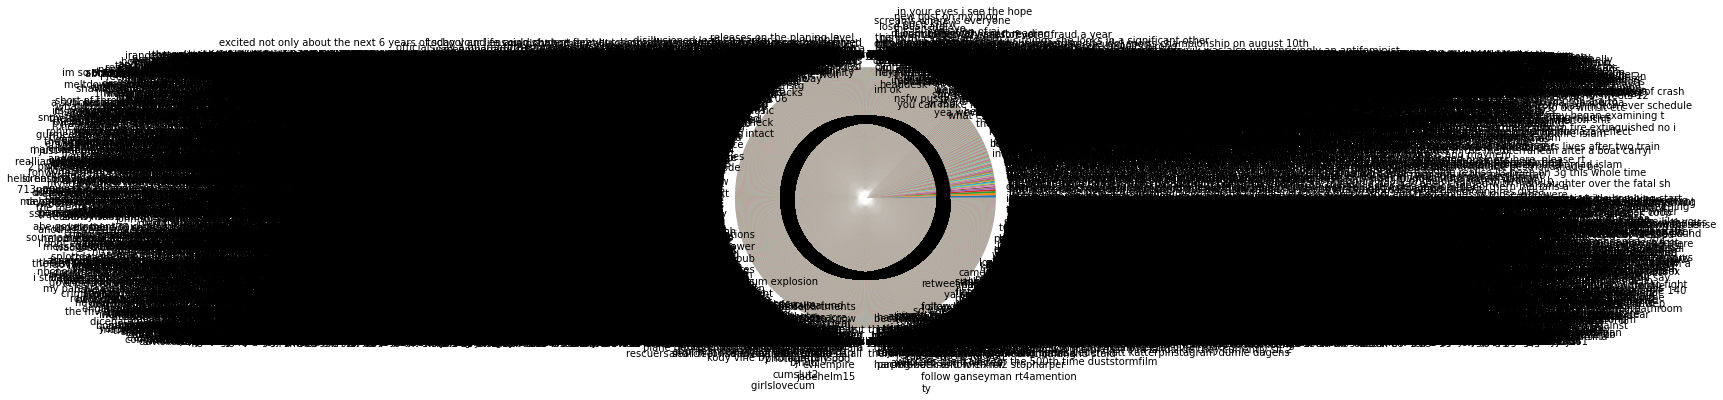

In [44]:
tweets.CleanText.value_counts().plot(kind="pie", autopct ="%1.0f%%")

In [31]:

X_train, X_test, y_train, y_test = train_test_split(tweets['text'], tweets['target'], test_size=0.2)
X_train.head()

5971    @ArianaGrande @justinbieber All the loves be s...
6369    Pic of 16yr old PKK suicide bomber who detonat...
6705                                           Thunder???
1388    So apparently there were bush fires near where...
6050    Large sinkhole swallows entire pond in Lowndes...
Name: text, dtype: object

In [32]:
tfidf_vect = TfidfVectorizer()
X_train_vect = tfidf_vect.fit_transform(X_train)
X_test_vect = tfidf_vect.transform(X_test)

In [34]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

In [35]:
y_pred = rf_model.predict(X_test_vect)

In [36]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {round(precision, 3)} Accuracy: {round((y_pred==y_test).sum()/len(y_pred), 3)}")







Precision: 0.845 Accuracy: 0.79
